In [1]:
import pytesseract as pt
from IPython import display
from PIL import Image
import os
import shutil
import pandas as pd


### renaming screenshots for easier ordering

In [2]:
index = 1
for file in sorted(os.listdir('data/originals')):
    if len(str(index)) == 1:
        shutil.copy(f'data/originals/{file}', f'data/reindexed/000{index}.PNG')
    elif len(str(index)) == 2:
        shutil.copy(f'data/originals/{file}', f'data/reindexed/00{index}.PNG')
    elif len(str(index)) == 3:
        shutil.copy(f'data/originals/{file}', f'data/reindexed/0{index}.PNG')
    elif len(str(index)) == 4:
        shutil.copy(f'data/originals/{file}', f'data/reindexed/{index}.PNG')
    index += 1


### dividing screenshots into tops and bottoms of profiles

In [3]:
for file in sorted(os.listdir('data/reindexed')):
    if int(file[3]) in (1,3,5,7,9):
        shutil.copy(f'data/reindexed/{file}', f'data/tops/{file}')
    elif int(file[3]) in (2,4,6,8,0):
        shutil.copy(f'data/reindexed/{file}', f'data/bottoms/{file}')


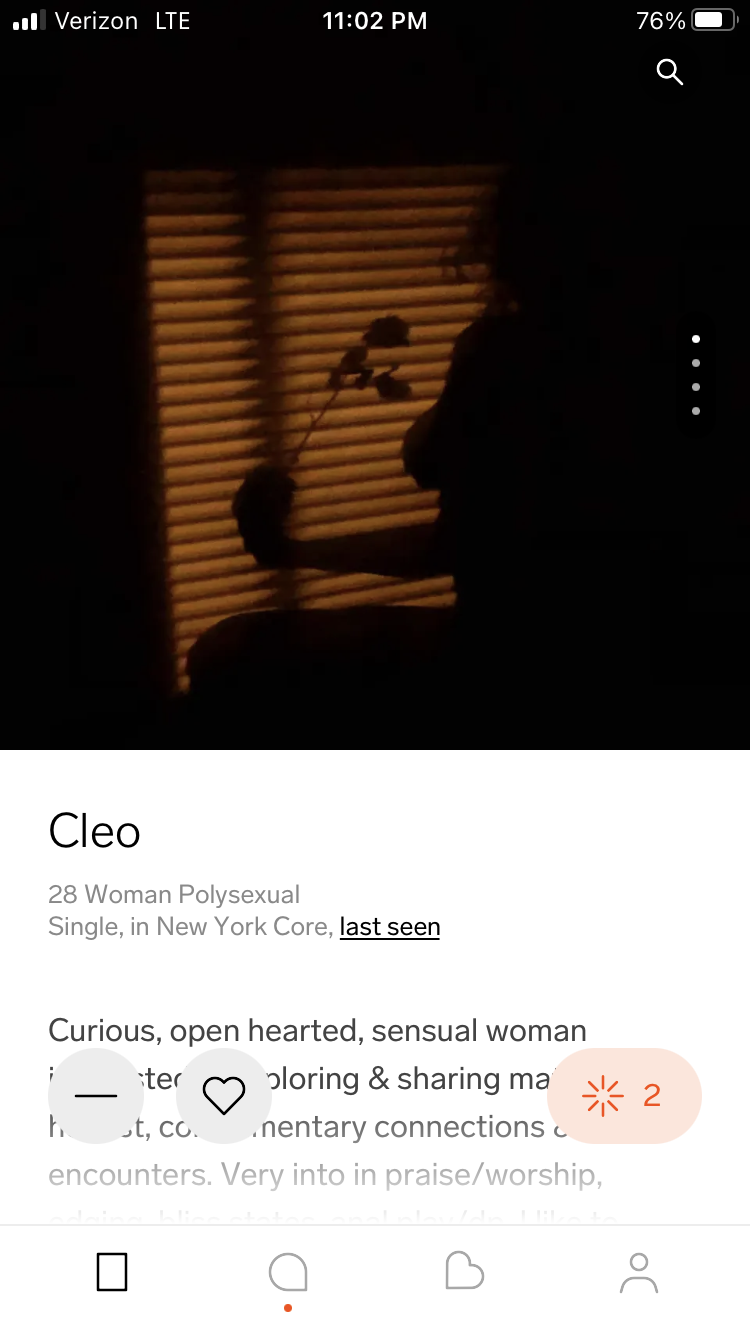

In [4]:
Image.open('data/example/tops/0235.PNG')


### cropping profile tops to desired text

In [5]:
for file in sorted(os.listdir('data/tops')):
    image = Image.open(f'data/tops/{file}')
    cropped = image.crop((30, 870, 460, 960))
    cropped.save(f'data/cropped_tops/cropped_{file}')


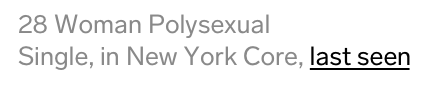

In [6]:
Image.open('data/example/cropped_tops/cropped_0235.PNG')


### extracting text from profile tops

In [7]:
demographics = []

for file in sorted(os.listdir('data/cropped_tops')):
    image = Image.open(f'data/cropped_tops/{file}')
    text = pt.image_to_string(image)
    demographics.append(text)


In [8]:
print(demographics[117])


28 Woman Polysexual
Single, in New York Core, last seen



### splitting demographic info 

In [9]:
age = []

for profile in demographics: 
    age.append(int(profile[:2]))

age[:10]


[25, 41, 32, 26, 34, 25, 34, 32, 36, 31]

In [10]:
demographics_remaining = [item[3:] for item in demographics]


In [11]:
gender_orientation = []

for profile in demographics_remaining:
    item = profile.split('\n')[0]
    gender_orientation.append(item)
gender_orientation[:10]


['Woman Pansexual',
 'Man Bisexual',
 'Man Gay',
 'Woman Bi-curious',
 'Woman Bisexual',
 'Woman Polysexual',
 'Woman Queer',
 'Woman Bisexual',
 'Woman Bisexual',
 'Woman Heteroflexible']

In [12]:
gender = []
orientation = []

for profile in gender_orientation:
    split = profile.split()
    if len(split) == 2:
        gender.append(split[0])
        orientation.append(split[1])
    else:
        gender.append(split[0] + ' ' + split[1])
        orientation.append(split[2])


In [13]:
print(gender[:5])
print(orientation[:5])


['Woman', 'Man', 'Man', 'Woman', 'Woman']
['Pansexual', 'Bisexual', 'Gay', 'Bi-curious', 'Bisexual']


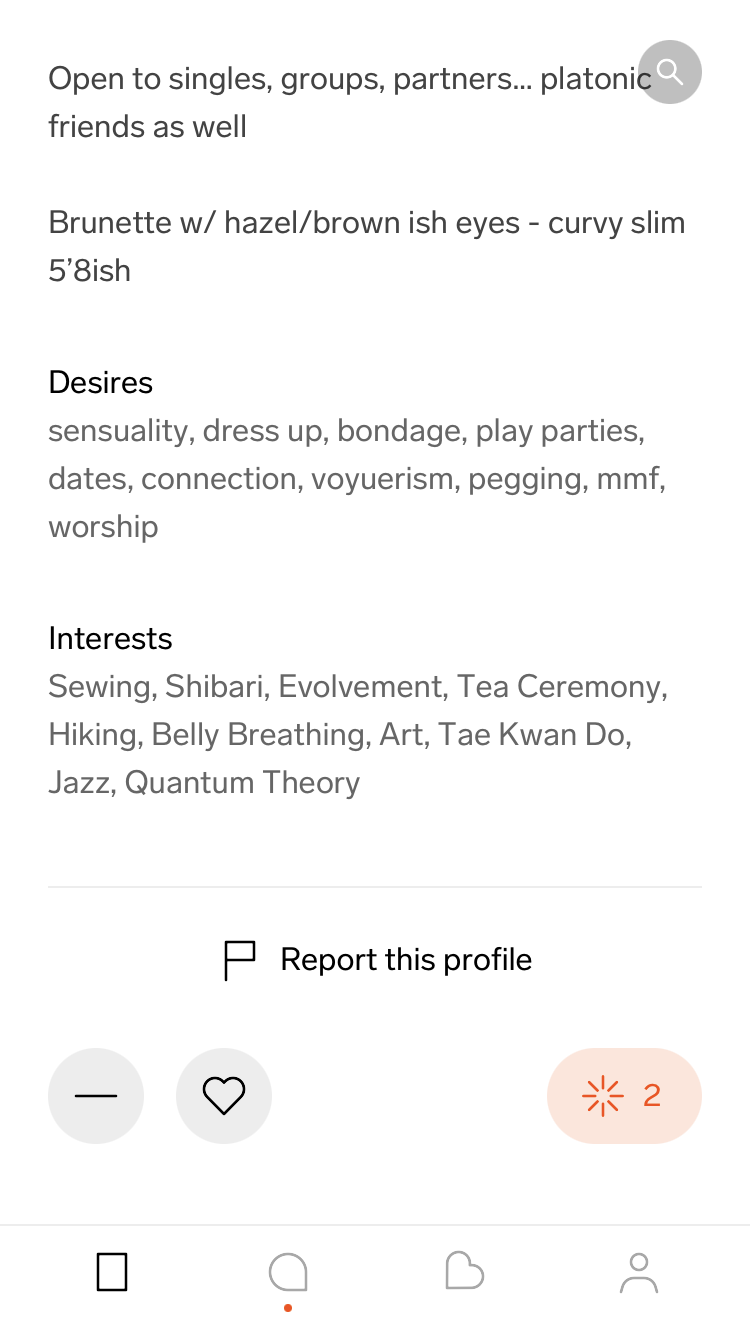

In [14]:
Image.open('data/example/bottoms/0236.PNG')


### cropping profile bottoms to desired text

In [15]:
for file in sorted(os.listdir('data/bottoms')):
    image = Image.open(f'data/bottoms/{file}')
    cropped = image.crop((30, 150, 730, 880))
    cropped.save(f'data/cropped_bottoms/cropped_{file}')
    

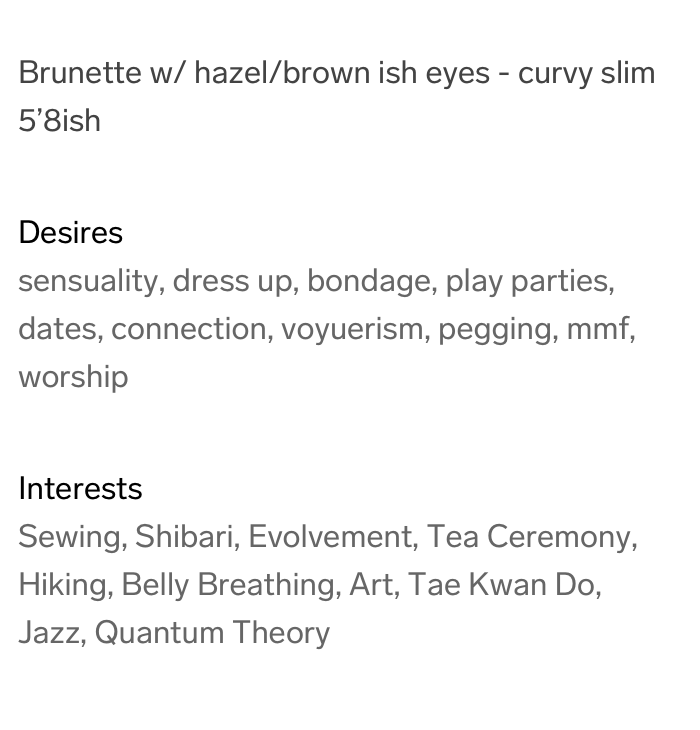

In [16]:
Image.open('data/example/cropped_bottoms/cropped_0236.PNG')


### extracting text from profile bottoms

In [17]:
profile_bottoms = []

for file in sorted(os.listdir('data/cropped_bottoms')):
    image = Image.open(f'data/cropped_bottoms/{file}')
    text = pt.image_to_string(image)
    profile_bottoms.append(text)


In [18]:
print(profile_bottoms[117])

Brunette w/ hazel/brown ish eyes - curvy slim
5’8ish

Desires

sensuality, dress up, bondage, play parties,
dates, connection, voyuerism, pegging, mmf,
worship

Interests

Sewing, Shibari, Evolvement, Tea Ceremony,
Hiking, Belly Breathing, Art, Tae Kwan Do,
Jazz, Quantum Theory



### extracting desires and interests

In [20]:
desires_interests = []

for profile in profile_bottoms:
    split = profile.split('Desires\n')
    desires_interests.append(split[1])
        

In [21]:
print(desires_interests[117])



sensuality, dress up, bondage, play parties,
dates, connection, voyuerism, pegging, mmf,
worship

Interests

Sewing, Shibari, Evolvement, Tea Ceremony,
Hiking, Belly Breathing, Art, Tae Kwan Do,
Jazz, Quantum Theory



In [22]:
desires = []
interests = []

for profile in desires_interests:
    split = profile.split('\n\nInterests\n')
    desires.append(split[0])
    interests.append(split[1])
    

In [23]:
print(desires[117])



sensuality, dress up, bondage, play parties,
dates, connection, voyuerism, pegging, mmf,
worship


In [24]:
print(interests[117])



Sewing, Shibari, Evolvement, Tea Ceremony,
Hiking, Belly Breathing, Art, Tae Kwan Do,
Jazz, Quantum Theory



### cleaning data

In [26]:
gender = [(item.lower()) for item in gender]
orientation = [(item.lower()) for item in orientation]
desires = [(item.lower()) for item in desires]
interests = [(item.lower()) for item in interests]


In [27]:
desires = [(item.replace('\n', ' ')) for item in desires]
desires = [(item.strip()) for item in desires]

interests = [(item.replace('\n', ' ')) for item in interests]
interests = [(item.strip()) for item in interests]


### converting desires and interests to lists 

In [29]:
desires_list = []

for collection in desires:
    splits = collection.split(',')
    splits = [item.strip() for item in splits]
    desires_list.append(splits)
    

In [30]:
interests_list = []

for collection in interests:
    splits = collection.split(',')
    splits = [item.strip() for item in splits]
    interests_list.append(splits)


In [31]:
print(age[117])
print(gender[117])
print(orientation[117])
print(desires_list[117])
print(interests_list[117])


28
woman
polysexual
['sensuality', 'dress up', 'bondage', 'play parties', 'dates', 'connection', 'voyuerism', 'pegging', 'mmf', 'worship']
['sewing', 'shibari', 'evolvement', 'tea ceremony', 'hiking', 'belly breathing', 'art', 'tae kwan do', 'jazz', 'quantum theory']


### creating dataframe containing all features

In [33]:
profiles_dict = {'age':age,'gender':gender,'orientation':orientation,'desires':desires_list,'interests':interests_list}

profiles_df = pd.DataFrame(profiles_dict)

profiles_df.head()


,age,gender,orientation,desires,interests
0,25,woman,pansexual,"[kink, bdsm, kinbaku, sensual, dates, mutual w...","[reading, science, hiking]"
1,41,man,bisexual,"[singles, friendships, dates]","[faith, music, rollerblading, art]"
2,32,man,gay,"[threeway, kink, friendships, casual, dominant...","[hiking, travel, concerts, beach, playing spor..."
3,26,woman,bi-curious,"[dominant, sensual, foreplay, dates, submissiv...","[traveling, tequila, languages, f1, live music..."
4,34,woman,bisexual,"[submissive, casual, sensual, friendships, kin...","[hiking, pole dance, fantasy/sci fi, kink, bak..."


In [34]:
profiles_df.loc[117]


age                                                           28
gender                                                     woman
orientation                                           polysexual
desires        [sensuality, dress up, bondage, play parties, ...
interests      [sewing, shibari, evolvement, tea ceremony, hi...
Name: 117, dtype: object

### correcting record mistakes

In [37]:
profiles_df['gender'].value_counts()


woman                   221
man                      70
non-binary               19
genderqueer               8
trans woman               5
gender fluid              3
transmasculine            2
gender questioning        2
other                     2
agender                   1
man bisexual,             1
trans human               1
gender nonconforming      1
Name: gender, dtype: int64

In [38]:
profiles_df[profiles_df['gender']=='man bisexual,']


,age,gender,orientation,desires,interests
113,22,"man bisexual,",21,"[poly, friendships, casual, dates, group, thre...","[djing, photography, making music, design, nig..."


In [39]:
profiles_df.at[113,'gender'] = 'man'


In [40]:
profiles_df['orientation'].value_counts()


straight          88
bisexual          66
queer             50
heteroflexible    37
pansexual         33
gay               26
bi-curious        14
homoflexible       8
polysexual         3
demisexual         3
androsexual        2
lesbian            2
graya              1
pansexual,         1
21                 1
heteroflexib       1
Name: orientation, dtype: int64

In [41]:
profiles_df[profiles_df['orientation']=='pansexual,']


,age,gender,orientation,desires,interests
109,29,trans woman,"pansexual,","[singles, dominant, threeway, dates, casual, f...","[makeup, photography, healthcare, gaming, art,..."


In [42]:
profiles_df.at[109,'orientation'] = 'pansexual'


In [43]:
profiles_df[profiles_df['orientation']=='heteroflexib']


,age,gender,orientation,desires,interests
226,35,gender questioning,heteroflexib,"[singles, casual, friendships, poly, foreplay,...","[theater, art, swimming, hiking, travel]"


In [44]:
profiles_df.at[226,'orientation'] = 'heteroflexible'


In [45]:
profiles_df = profiles_df[profiles_df['orientation']!='21']


### grouping genders with only one instance into 'other' category

In [47]:
profiles_df['gender'].value_counts()


woman                   221
man                      70
non-binary               19
genderqueer               8
trans woman               5
gender fluid              3
transmasculine            2
gender questioning        2
other                     2
agender                   1
trans human               1
gender nonconforming      1
Name: gender, dtype: int64

In [48]:
profiles_df.loc[profiles_df["gender"] == "agender", "gender"] = "other"
profiles_df.loc[profiles_df["gender"] == "trans human", "gender"] = "other"
profiles_df.loc[profiles_df["gender"] == "gender nonconforming", "gender"] = "other"


In [49]:
profiles_df['gender'].value_counts()


woman                 221
man                    70
non-binary             19
genderqueer             8
other                   5
trans woman             5
gender fluid            3
transmasculine          2
gender questioning      2
Name: gender, dtype: int64

In [50]:
len(profiles_df)


335

**335 users profiled!**

### saving dataframe to pickle file

In [53]:
profiles_df = profiles_df.reset_index(drop=True)


In [54]:
profiles_df.to_pickle('data/extracted/profiles')


### identifying top desires and interests

In [56]:
full_desires = []

for desire_list in profiles_df['desires']:
    for item in desire_list:
        full_desires.append(item)
        

In [57]:
desires_dict = {}

for i in full_desires:
    if i in desires_dict.keys():
        desires_dict[i] += 1
    else:
        desires_dict[i] = 1


In [58]:
full_interests = []

for interest_list in profiles_df['interests']:
    for item in interest_list:
        full_interests.append(item)
        

In [59]:
interests_dict = {}

for i in full_interests:
    if i in interests_dict.keys():
        interests_dict[i] += 1
    else:
        interests_dict[i] = 1
        

In [60]:
len(desires_dict)


349

In [61]:
len(interests_dict)


756

**number of unique interests more than double unique desires**

In [63]:
ranking_desires = []

for k,v in desires_dict.items():
    ranking_desires.append((v,k))

ranking_desires.sort(reverse=True)


In [64]:
ranking_interests= []

for k,v in interests_dict.items():
    ranking_interests.append((v,k))

ranking_interests.sort(reverse=True)


In [65]:
top_desires = ranking_desires[:24]
top_desires


[(182, 'dates'),
 (163, 'singles'),
 (153, 'casual'),
 (147, 'sensual'),
 (127, 'kink'),
 (120, 'friendships'),
 (111, 'foreplay'),
 (105, 'dominant'),
 (87, 'couples'),
 (86, 'bdsm'),
 (85, 'submissive'),
 (71, 'threeway'),
 (65, 'poly'),
 (62, 'fun'),
 (60, 'texting'),
 (58, 'group'),
 (55, 'fwb'),
 (43, 'watching'),
 (30, 'mmf'),
 (19, 'mfm'),
 (19, 'bondage'),
 (15, 'ffm'),
 (12, 'ggg'),
 (10, 'switch')]

In [66]:
top_interests = ranking_interests[:24]
top_interests


[(74, 'travel'),
 (66, 'music'),
 (65, 'art'),
 (50, 'reading'),
 (50, 'cooking'),
 (37, 'dancing'),
 (33, 'movies'),
 (30, 'museums'),
 (30, 'hiking'),
 (23, '420'),
 (22, 'yoga'),
 (22, 'writing'),
 (21, 'food'),
 (19, 'film'),
 (18, 'nature'),
 (16, 'wine'),
 (16, 'traveling'),
 (16, 'books'),
 (15, 'running'),
 (15, 'concerts'),
 (13, 'fitness'),
 (13, 'dance'),
 (13, 'baking'),
 (12, 'swimming')]

In [68]:
top_desires_df = pd.DataFrame({'desire':[d[1] for d in top_desires],'count':[d[0] for d in top_desires]})
top_desires_df


,desire,count
0,dates,182
1,singles,163
2,casual,153
3,sensual,147
4,kink,127
5,friendships,120
6,foreplay,111
7,dominant,105
8,couples,87
9,bdsm,86


In [69]:
top_interests_df = pd.DataFrame({'interest':[i[1] for i in top_interests],'count':[i[0] for i in top_interests]})
top_interests_df


,interest,count
0,travel,74
1,music,66
2,art,65
3,reading,50
4,cooking,50
5,dancing,37
6,movies,33
7,museums,30
8,hiking,30
9,420,23


In [70]:
top_desires_df.to_csv('data/extracted/top_desires.csv',index=False)
top_interests_df.to_csv('data/extracted/top_interests.csv', index=False)


### converting top 24 desires and interests to one-hot-encoding


In [72]:
df = profiles_df.copy()


In [73]:
df

,age,gender,orientation,desires,interests
0,25,woman,pansexual,"[kink, bdsm, kinbaku, sensual, dates, mutual w...","[reading, science, hiking]"
1,41,man,bisexual,"[singles, friendships, dates]","[faith, music, rollerblading, art]"
2,32,man,gay,"[threeway, kink, friendships, casual, dominant...","[hiking, travel, concerts, beach, playing spor..."
3,26,woman,bi-curious,"[dominant, sensual, foreplay, dates, submissiv...","[traveling, tequila, languages, f1, live music..."
4,34,woman,bisexual,"[submissive, casual, sensual, friendships, kin...","[hiking, pole dance, fantasy/sci fi, kink, bak..."
...,...,...,...,...,...
330,27,woman,bisexual,"[couples, dating, kink, threesomes]","[musical theater, writing]"
331,46,woman,straight,"[singles, foreplay, fwb, boyfriend, servant, k...","[horror movies, bud dwyer, existentialism, cul..."
332,30,woman,bisexual,"[threeway, singles, kink, bdsm, dominant, frie...",[shibari]
333,24,woman,bisexual,"[singles, dominant, casual, kink, sensual]","[mutual aid, backpacking, cooking, writing, te..."


In [74]:
for item in top_desires:
    col_name = item[1]
    df['desire: ' + col_name] = 0
    
for item in top_interests:
    col_name = item[1]
    df['interest: ' + col_name] = 0
    

In [75]:
df.head()


,age,gender,orientation,desires,interests,desire: dates,desire: singles,desire: casual,desire: sensual,desire: kink,...,interest: nature,interest: wine,interest: traveling,interest: books,interest: running,interest: concerts,interest: fitness,interest: dance,interest: baking,interest: swimming
0,25,woman,pansexual,"[kink, bdsm, kinbaku, sensual, dates, mutual w...","[reading, science, hiking]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,man,bisexual,"[singles, friendships, dates]","[faith, music, rollerblading, art]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,man,gay,"[threeway, kink, friendships, casual, dominant...","[hiking, travel, concerts, beach, playing spor...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,woman,bi-curious,"[dominant, sensual, foreplay, dates, submissiv...","[traveling, tequila, languages, f1, live music...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,woman,bisexual,"[submissive, casual, sensual, friendships, kin...","[hiking, pole dance, fantasy/sci fi, kink, bak...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
for i in df.index:
    for d in df['desires'][i]:
        if "desire: " + d in df.columns:
            df["desire: " + d][i] = 1


/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/502482958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["desire: " + d][i] = 1


In [77]:
for i in df.index:
    for d in df['interests'][i]:
        if "interest: " + d in df.columns:
            df["interest: " + d][i] = 1
            

/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/3519338525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["interest: " + d][i] = 1


In [78]:
df = df.drop('desires',axis=1)
df = df.drop('interests',axis=1)


In [79]:
df.head()


,age,gender,orientation,desire: dates,desire: singles,desire: casual,desire: sensual,desire: kink,desire: friendships,desire: foreplay,...,interest: nature,interest: wine,interest: traveling,interest: books,interest: running,interest: concerts,interest: fitness,interest: dance,interest: baking,interest: swimming
0,25,woman,pansexual,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,man,bisexual,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,32,man,gay,0,0,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,26,woman,bi-curious,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,34,woman,bisexual,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
df.to_csv('data/extracted/profiles_top25.csv',index=False)


### creating dataframe with all desires and interests encoded, not just top 24

In [82]:
df_full = profiles_df.copy()


In [83]:
df_full


,age,gender,orientation,desires,interests
0,25,woman,pansexual,"[kink, bdsm, kinbaku, sensual, dates, mutual w...","[reading, science, hiking]"
1,41,man,bisexual,"[singles, friendships, dates]","[faith, music, rollerblading, art]"
2,32,man,gay,"[threeway, kink, friendships, casual, dominant...","[hiking, travel, concerts, beach, playing spor..."
3,26,woman,bi-curious,"[dominant, sensual, foreplay, dates, submissiv...","[traveling, tequila, languages, f1, live music..."
4,34,woman,bisexual,"[submissive, casual, sensual, friendships, kin...","[hiking, pole dance, fantasy/sci fi, kink, bak..."
...,...,...,...,...,...
330,27,woman,bisexual,"[couples, dating, kink, threesomes]","[musical theater, writing]"
331,46,woman,straight,"[singles, foreplay, fwb, boyfriend, servant, k...","[horror movies, bud dwyer, existentialism, cul..."
332,30,woman,bisexual,"[threeway, singles, kink, bdsm, dominant, frie...",[shibari]
333,24,woman,bisexual,"[singles, dominant, casual, kink, sensual]","[mutual aid, backpacking, cooking, writing, te..."


In [84]:
for item in ranking_desires:
    col_name = item[1]
    df_full['desire: ' + col_name] = 0
    
for item in ranking_interests:
    col_name = item[1]
    df_full['interest: ' + col_name] = 0

/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['desire: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['desire: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['interest: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['interest: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['interest: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['interest: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['interest: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_full['interest: ' + col_name] = 0
/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/1666168827.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [85]:
df_full.head()


,age,gender,orientation,desires,interests,desire: dates,desire: singles,desire: casual,desire: sensual,desire: kink,...,interest: aerial dance,interest: aerial,interest: activist,interest: activism,interest: active,interest: acting,interest: acro yoga,interest: abolition,interest: a perfect taco,interest: 4/20
0,25,woman,pansexual,"[kink, bdsm, kinbaku, sensual, dates, mutual w...","[reading, science, hiking]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,man,bisexual,"[singles, friendships, dates]","[faith, music, rollerblading, art]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,man,gay,"[threeway, kink, friendships, casual, dominant...","[hiking, travel, concerts, beach, playing spor...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,woman,bi-curious,"[dominant, sensual, foreplay, dates, submissiv...","[traveling, tequila, languages, f1, live music...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34,woman,bisexual,"[submissive, casual, sensual, friendships, kin...","[hiking, pole dance, fantasy/sci fi, kink, bak...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
for i in df_full.index:
    for d in df_full['desires'][i]:
        if "desire: " + d in df_full.columns:
            df_full["desire: " + d][i] = 1


/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/2937922555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full["desire: " + d][i] = 1


In [87]:
for i in df_full.index:
    for d in df_full['interests'][i]:
        if "interest: " + d in df_full.columns:
            df_full["interest: " + d][i] = 1
            

/var/folders/6r/25t48ttd22sf4h8zsln4prl80000gn/T/ipykernel_9022/38019671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full["interest: " + d][i] = 1


In [88]:
df_full.head()


,age,gender,orientation,desires,interests,desire: dates,desire: singles,desire: casual,desire: sensual,desire: kink,...,interest: aerial dance,interest: aerial,interest: activist,interest: activism,interest: active,interest: acting,interest: acro yoga,interest: abolition,interest: a perfect taco,interest: 4/20
0,25,woman,pansexual,"[kink, bdsm, kinbaku, sensual, dates, mutual w...","[reading, science, hiking]",1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,41,man,bisexual,"[singles, friendships, dates]","[faith, music, rollerblading, art]",1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,man,gay,"[threeway, kink, friendships, casual, dominant...","[hiking, travel, concerts, beach, playing spor...",0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,26,woman,bi-curious,"[dominant, sensual, foreplay, dates, submissiv...","[traveling, tequila, languages, f1, live music...",1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,34,woman,bisexual,"[submissive, casual, sensual, friendships, kin...","[hiking, pole dance, fantasy/sci fi, kink, bak...",0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_full.to_csv('data/extracted/profiles_full.csv',index=False)
